<a href="https://colab.research.google.com/github/dikshanta10-debug/3new/blob/main/assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [ ]:
titanic_df = pd.read_csv('Titanic.csv')
titanic_df['Survived'] = titanic_df['Survived'].map({1: 'Yes', 0: 'No'})
contingency_table_of_survival = pd.crosstab(titanic_df['Survived'], titanic_df['PClass'], margins=True)
print("Contingency Table for Passenger Class and Survival:\n")
print(contingency_table_of_survival)

Contingency Table for Passenger Class and Survival:

PClass    1st  2nd  3rd   All
Survived                     
No        129  161  573   863
Yes       193  119  138   450
All       322  280  711  1313


In [ ]:
# Part (b): Calculate the conditional distribution of survival given passenger class
conditional_distribution_pclass = pd.crosstab(titanic_df['Survived'], titanic_df['PClass'], normalize='columns')
print("The conditional distribution of survival given passenger class:\n")
print(conditional_distribution_pclass)

The conditional distribution of survival given passenger class:

PClass         1st    2nd       3rd
Survived                           
No        0.400621  0.575  0.805907
Yes       0.599379  0.425  0.194093


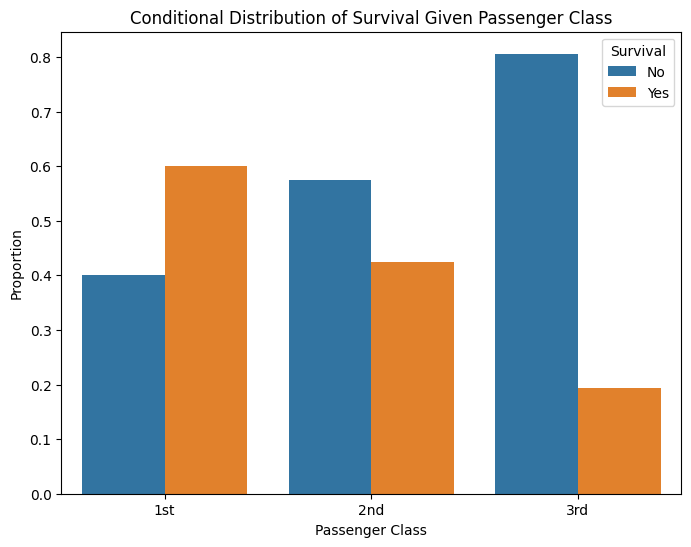

In [ ]:
# Step c
conditional_distribution_pclass_stacked = conditional_distribution_pclass.stack().reset_index()
conditional_distribution_pclass_stacked.columns = ['Survived', 'PClass', 'Proportion']
plt.figure(figsize=(8, 6))
sns.barplot(data=conditional_distribution_pclass_stacked, x='PClass', y='Proportion', hue='Survived')
plt.title("Conditional Distribution of Survival Given Passenger Class")
plt.ylabel("Proportion")
plt.xlabel("Passenger Class")
plt.legend(title="Survival")
plt.show()

In [ ]:
# Part (d): Analysis of relationship between survival and passenger class
print("The bar chart indicates that 1st class passengers had the highest survival \n"
"rates, followed by the 2nd class passengers,\nand finally with the 3rd class passengers who had the lowest.\n"
"This implies that there is a relationship between being in an upper passenger\nclass and having a greater\n"
"likelihood of survival, where those people were probably prioritized.")

The bar chart indicates that 1st class passengers had the highest survival 
rates, followed by the 2nd class passengers,
and finally with the 3rd class passengers who had the lowest.
This implies that there is a relationship between being in an upper passenger
class and having a greater
likelihood of survival, where those people were probably prioritized.


In [ ]:
# Part (e): Create a contingency table for Sex and Survival
contingency_table_sex = pd.crosstab(titanic_df['Survived'], titanic_df['Sex'], margins=True)
print("Contingency Table for Sex and Survival:\n")
print(contingency_table_sex)

Contingency Table for Sex and Survival:

Sex       female  male   All
Survived                    
No           154   709   863
Yes          308   142   450
All          462   851  1313


In [ ]:
# Part (f): Calculate the conditional distribution of survival given sex
conditional_distribution_sex = pd.crosstab(titanic_df['Survived'], titanic_df['Sex'], normalize='columns')
print("Conditional Distribution of Survival Given Sex:\n")
print(conditional_distribution_sex)

Conditional Distribution of Survival Given Sex:

Sex         female      male
Survived                    
No        0.333333  0.833137
Yes       0.666667  0.166863


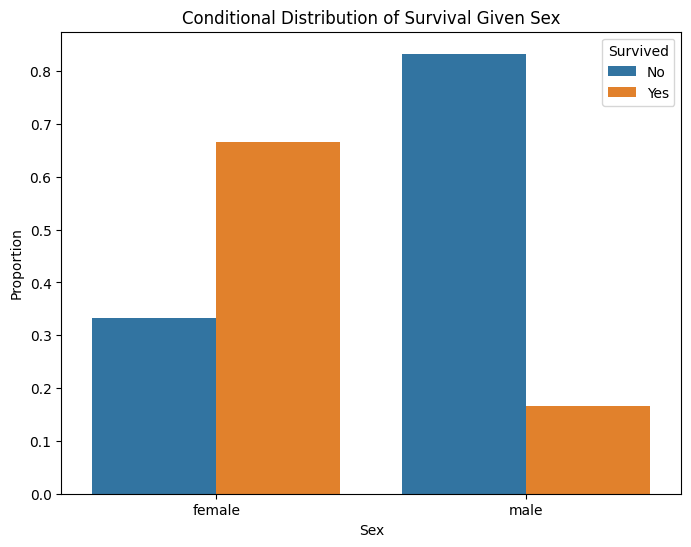

In [ ]:
# Step g
conditional_distribution_sex = conditional_distribution_sex.stack().reset_index()
conditional_distribution_sex.columns = ['Survived', 'Sex', 'Proportion']
plt.figure(figsize=(8, 6))
sns.barplot(data=conditional_distribution_sex, x='Sex', y='Proportion', hue='Survived')
plt.title("Conditional Distribution of Survival Given Sex")
plt.ylabel("Proportion")
plt.xlabel("Sex")
plt.legend(title="Survived")
plt.show()



In [ ]:
# Part (h): Analysis of relationship between survival and sex
print("This graph highlights a strong relationship between sex and survival, suggesting that females were\n"
 "significantly more likely to survive than their male counterparts and perhaps were prioritized.")


This graph highlights a strong relationship between sex and survival, suggesting that females were
significantly more likely to survive than their male counterparts and perhaps were prioritized.


Equation of the regression line: Weight = (41.46 * Length1) + -667.10

Interpretation:
- Slope (41.46): On average for every extra centimeter in vertical length (Length1)
  the fish's weight increases by about 41.46 grams.
- Intercept (-667.10): When Length1 is zero, the forecasted weight would be -667.10 grams.
  While this figure isn’t practical in this context, it is essential for the regression line.


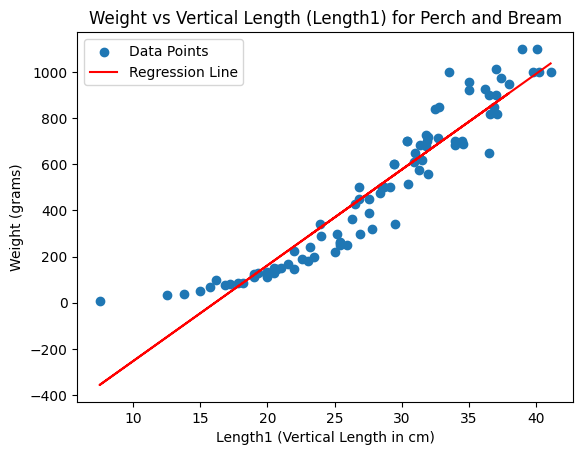

In [ ]:
# Part (a): Least-squares regression line for predicting Weight from Length1
fish_df = pd.read_csv('Fish.csv')
PerchBream = fish_df[fish_df['Species'].isin(['Perch', 'Bream'])]
slope, intercept, r_value, p_value, std_err = stats.linregress(PerchBream['Length1'], PerchBream['Weight'])
print(f"Equation of the regression line: Weight = ({slope:.2f} * Length1) + {intercept:.2f}")
# Interpretation of the slope and intercept
print(f"\nInterpretation:\n- Slope ({slope:.2f}): On average for every extra centimeter in vertical length (Length1)\n"
"  the fish's weight increases by about 41.46 grams.\n"
      f"- Intercept ({intercept:.2f}): When Length1 is zero, the forecasted weight would be {intercept:.2f} grams.\n"
      "  While this figure isn’t practical in this context, it is essential for the regression line.")
# Scatter plot with regression line
plt.scatter(PerchBream['Length1'], PerchBream['Weight'], label="Data Points")
plt.plot(PerchBream['Length1'], slope * PerchBream['Length1'] + intercept, color="red", label="Regression Line")
plt.title("Weight vs Vertical Length (Length1) for Perch and Bream")
plt.xlabel("Length1 (Vertical Length in cm)")
plt.ylabel("Weight (grams)")
plt.legend()
plt.show()

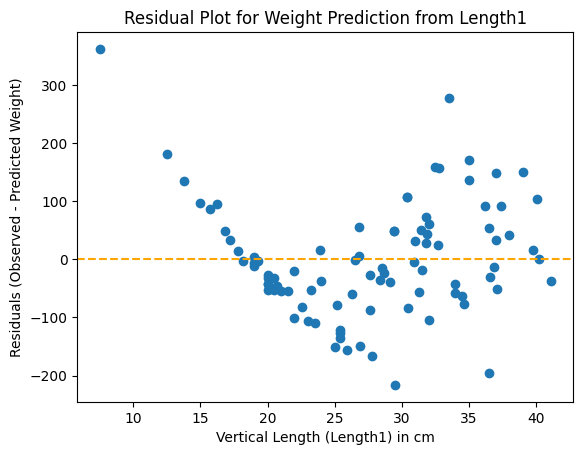

The residual plot shows a curved pattern instead of being symmetric at 0, which indicates that the relationship between Length1
(vertical length) and Weight is non-linear. This curvature suggests that the linear regression model is not a good fit 
for this data and our assumptions for our model aren't met like our assumption that it's linear.Since the model's assumptions are
not met it can't be valid.


In [ ]:
# Part (b): Residual plot to check assumptions
y_pred = slope * PerchBream['Length1'] + intercept
residuals = PerchBream['Weight'] - y_pred
plt.scatter(PerchBream['Length1'], residuals)
plt.axhline(y=0, color='orange', linestyle='--')
plt.title("Residual Plot for Weight Prediction from Length1")
plt.xlabel("Vertical Length (Length1) in cm")
plt.ylabel("Residuals (Observed - Predicted Weight)")
plt.show()
print("The residual plot shows a curved pattern instead of being symmetric at 0, which indicates that the relationship between Length1"
"\n""(vertical length) and Weight is non-linear. This curvature suggests that the linear regression model is not a good fit \n"""
"for this data and our assumptions for our model aren't met like our assumption that it's linear.Since the model's assumptions are\n"
 "not met it can't be valid.")

In [ ]:
titanic_df = pd.read_csv('Titanic.csv')
random_seed = 123
sampled_passengers = titanic_df.sample(n=6, random_state=random_seed)
sampled_passenger_names = sampled_passengers['Name']
print("Selected passengers for the sample:\n")
print(sampled_passenger_names.tolist())

Selected passengers for the sample:

['Nasser (Nasrallah), Mr Nicholas', 'Goodwin, Master Harold V', 'Murphy, Miss Margaret', 'Collett, Mr Sidney C Stuart', 'Weisz, Mrs Leopold (Mathilde)', 'Yalsevac, Mr Ivan']
